# E-Commerce Sales Data Analysis

## Project Objective

To analyze sales performance data from an E-Commerce store to extract meaningful insights and support data-driven business decisions.

###  1. Import Libraries and Load Data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [65]:
df = pd.read_feather(r"C:\Users\dimas\Downloads\4..+Sales+Analysis/Sales_data.ftr")

In [66]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"




The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost ,purchase address, etc



## 2. Data cleaning and formatting

###### 2.1 Check Missing Values

In [67]:
df.isnull().sum() ## checking out total missing values we have 

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [68]:
### since there 545 observations where entire row have missing value , we can drop these 545 rows..

df = df.dropna(how="all")

In [69]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##### 2.2 Check and Remove Duplicates

In [71]:
df.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [72]:
df[df.duplicated()] ## total 618 duplicate rows ..

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [73]:
df = df.drop_duplicates() ## Dropping all the duplicate rows ..

In [74]:
df[df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### 2.3 Extract Month from "Order Date"

In [75]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [76]:
df['Order Date'][0]

'04/19/19 08:46'

In [77]:
# Simple Approach using '/'

In [78]:
df['Order Date'][0].split('/')[0] ## extracting month from "Order Date"

'04'

In [79]:
def return_month(x):
    return x.split('/')[0]

In [80]:
df['Month'] = df['Order Date'].apply(return_month) ## applying return_month function on top of "Order Date" feature

In [81]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### 2.4 Change Data Type (Month,Quantity, and Price)

In [82]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [83]:
df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [84]:
filter1 = df['Month'] == 'Order Date'

In [85]:
df[~filter1] # ~ means not

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [86]:
df = df[~filter1] ## excluding all those rows which have entry as "Order Date" in month feature ..

In [87]:
df['Month'].astype(int)

0         4
2         4
3         4
4         4
5         4
         ..
186845    9
186846    9
186847    9
186848    9
186849    9
Name: Month, Length: 185686, dtype: int64

In [88]:
df['Month'] = df['Month'].astype(int)

In [89]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [90]:
### other columns

In [91]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [92]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

##### 2.5 Create Sales Column

In [94]:
### create sales columns by multiply quantity ordered and price

In [93]:
df['sales'] = df['Quantity Ordered'] * df['Price Each'] ## creating sales feature

In [95]:
df['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185686, dtype: float64

# Exploratory Data Analysis

##### 3.1 What is the Best Month for Sales?

In [98]:
df.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

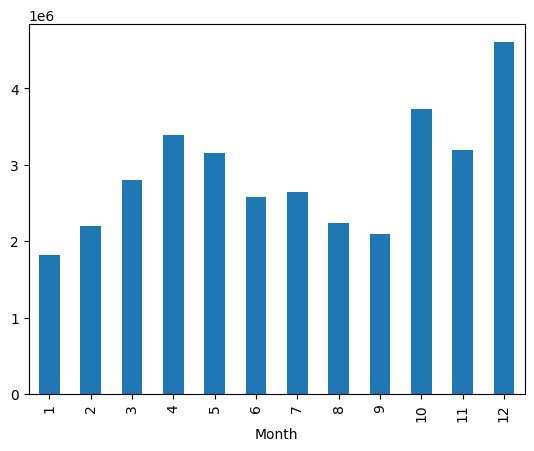

In [99]:
df.groupby(['Month'])['sales'].sum().plot(kind='bar')

y-axis scale : 1e^6

* E stands for exponential , in short it is *10^

* So, 1e6 or 1e^6 OR 1 exponent 6 is the same as 1*10^6 which is same as 1,000,000

Inference : December is the best month of sales ..

##### 3.2  What product sold the most &  Why?

In [100]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales'],
      dtype='object')

###### 3.2.1 Aggregate Product Data

In [101]:
count_df = df.groupby(['Product']).agg({'Quantity Ordered':'sum' , 'Price Each':'mean'})

In [102]:
count_df = count_df.reset_index()

In [103]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [105]:
products = count_df['Product'].values

##### 3.2.2  Visualize Quantity Ordered by Product

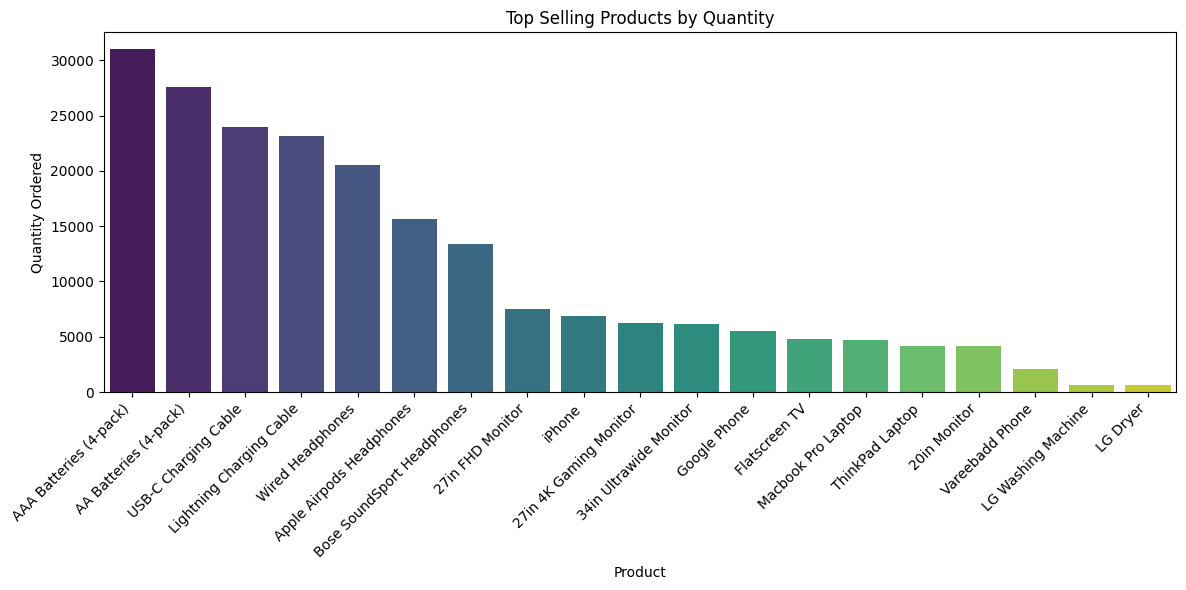

In [114]:
plt.figure(figsize=(12,6))
sns.barplot(data=count_df.sort_values('Quantity Ordered', ascending=False), 
            x='Product', y='Quantity Ordered', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top Selling Products by Quantity')
plt.tight_layout()
plt.show()

##### 3.2.3  Visualize Average Price by Product

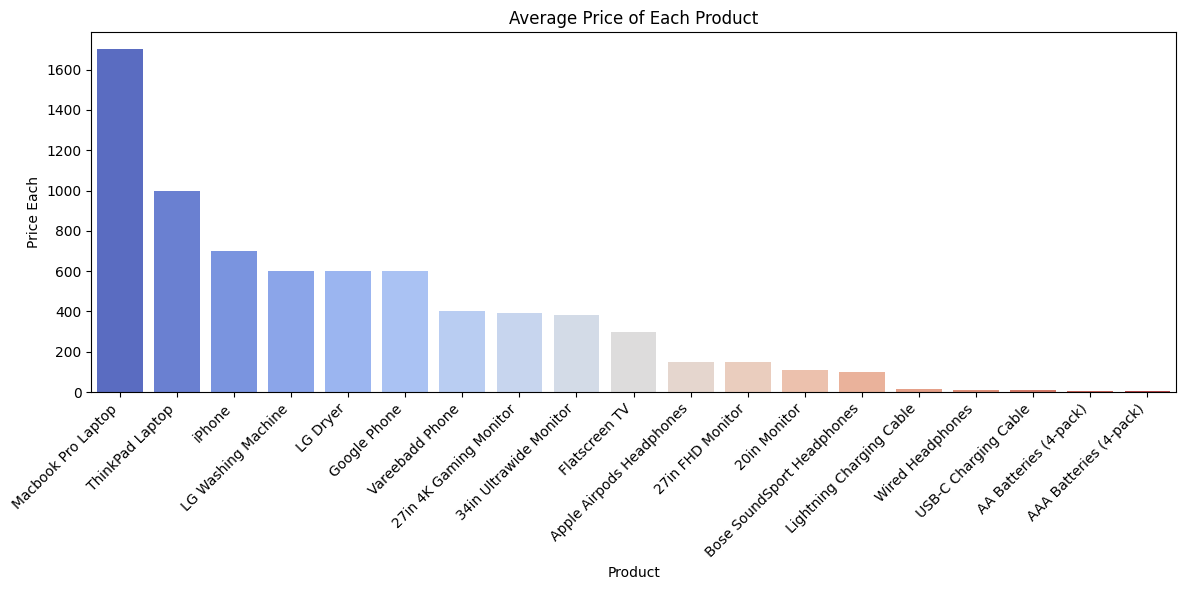

In [115]:
plt.figure(figsize=(12,6))
sns.barplot(data=count_df.sort_values('Price Each', ascending=False), 
            x='Product', y='Price Each', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Average Price of Each Product')
plt.tight_layout()
plt.show()

##### 3.2.4 Compare Quantity Ordered vs Price

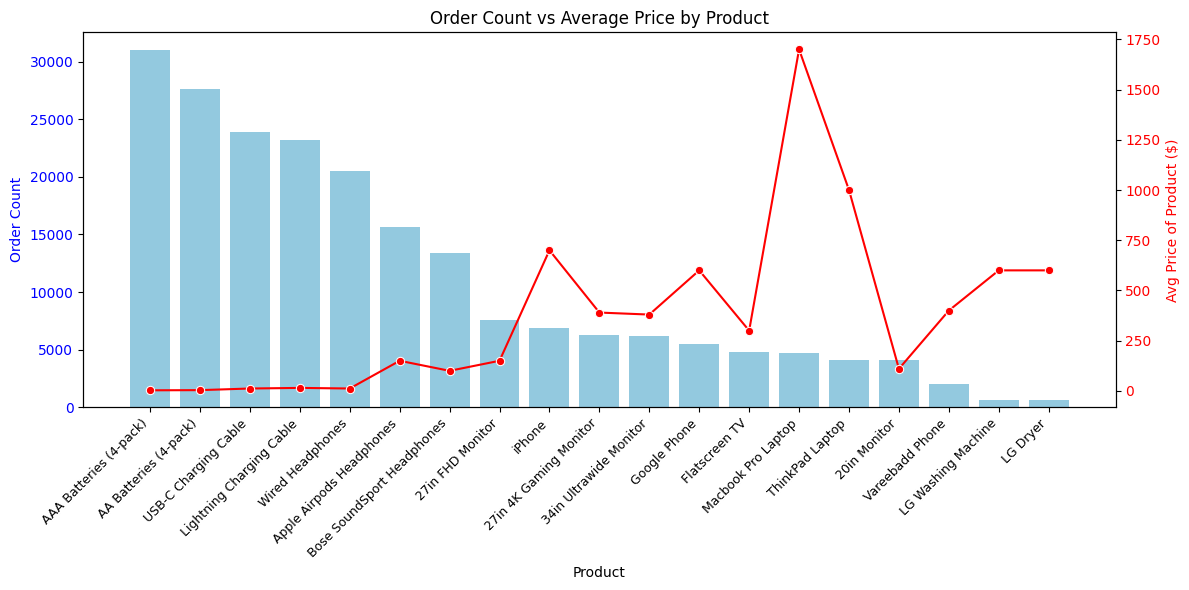

In [119]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Sort (Urutkan dulu)
count_df = count_df.sort_values('Quantity Ordered', ascending=False)

# Barplot for Quantity Ordered (sumbu kiri)
sns.barplot(data=count_df, x='Product', y='Quantity Ordered', ax=ax1, color='skyblue')
ax1.set_ylabel('Order Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Lineplot for Price Each (sumbu kanan)
ax2 = ax1.twinx()
sns.lineplot(data=count_df, x='Product', y='Price Each', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Avg Price of Product ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# X-axis label rotasi agar tidak tumpang tindih
ax1.set_xticklabels(products, rotation=45, ha='right', fontsize=9)

# Judul & layout
plt.title('Order Count vs Average Price by Product')
plt.tight_layout()
plt.show()



Insights : 

* The top selling product is 'AAA Batteries'. 
* The top selling products seems to have a correlation with the price of the product. 
* The cheaper the product higher the quantity ordered and vice versa.





##### 3.3 What products are most often sold together ?

* keep orders that have same order Id, are sold mostly together ..
* Approach : ie keep duplicated data 

In [127]:
df['Order ID'] 

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

##### 3.3.1 Identify Multi-Product Orders

In [128]:
df_duplicated = df[df['Order ID'].duplicated(keep=False)]

In [129]:
df_duplicated ## dataframe in which we have those Order Ids who have purchased more products !

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98
...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00


In [130]:
group_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})

## for every Order-Id , collect all the products ..

In [131]:
group_products

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


##### 3.3.2 Find Top 10 Combinations

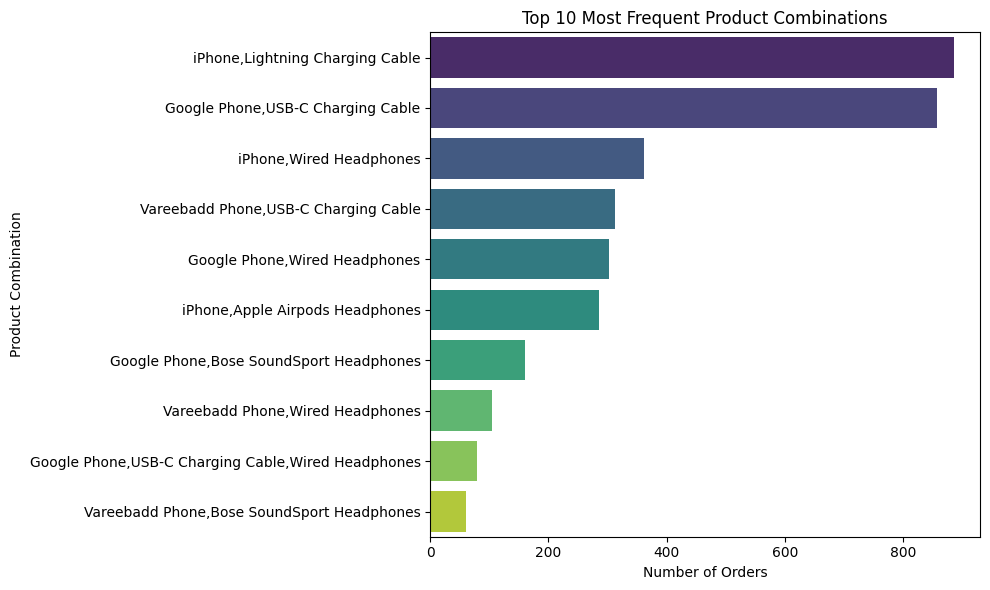

In [136]:
# Hitung dan simpan ke dataframe
combo_df = group_products['grouped_products'].value_counts().reset_index()
combo_df.columns = ['Combination', 'Count']

# Ambil top 10
top_combos = combo_df.head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_combos, x='Count', y='Combination', palette='viridis')
plt.title('Top 10 Most Frequent Product Combinations')
plt.xlabel('Number of Orders')
plt.ylabel('Product Combination')
plt.tight_layout()
plt.show()

# Key Insights

#### 1. Best Month for Sales

* Sales peaked in December, making it the best month in terms of total revenue.

* A consistent increase in sales is observed toward the end of the year.

Insight:
This trend may reflect the impact of holiday shopping season, year-end discounts, and gifting behavior. Businesses could capitalize on this by offering promotions during Q4.

#### 2. Top Selling Products

* AAA Batteries (4-pack) is the top-selling product by quantity.

* Products such as AAA Batteries, AA Batteries, and USB-C Charging Cables lead in sales volume.

* A negative correlation is observed between product price and quantity sold: cheaper products are sold in higher volumes.

Insight:
Affordable, frequently used accessories (batteries, cables) dominate in volume. Lower-priced items have higher demand, making them ideal for upselling or bundling strategies.

#### 3. Price vs. Quantity Ordered

* Products priced lower tend to sell more units.

* Higher-priced items like Macbooks and ThinkPads have significantly lower order volumes.

Insight:
Pricing strategy heavily influences customer purchase behavior. Low-cost essential items drive sales volume, while high-ticket products contribute more to revenue per transaction.

#### 4. Most Common Product Combinations

The most frequently purchased combinations include:

* iPhone + Lightning Charging Cable

* Google Phone + USB-C Charging Cable

* Iphone  + Wired Headphone

Customers often buy accessories with main products (phones/laptops).

Insight:
Cross-selling opportunities are evident—customers often buy complementary products in one transaction. E-commerce platforms should implement smart recommendations for accessories during checkout.




# Conclusion

* December is the best-performing month in terms of total sales revenue.

* Low-priced, essential items such as batteries and cables are the top sellers by volume.

* There's a clear inverse relationship between product price and sales volume.

* Bundled purchases are common, particularly with electronics and their accessories.

* These insights can guide marketing campaigns, inventory planning, and personalized recommendation systems to boost sales and customer satisfaction.
